In [1]:
import sys
sys.path.append('/home/greg/GitHub/')
import pyEDIutils.changes as edi
import pandas as pd
import numpy as np

In [3]:
new = edi.request_changes('2020-12-02', '2020-12-31')

Requesting PASTA changes for knb-lter-jrn from 2020-12-02 to 2020-12-31
0 duplicate records were removed.


In [4]:
old = edi.archived_changes()

Reading archived PASTA request knb-lter-jrn_20150417-20181231.xml
Reading archived PASTA request knb-lter-jrn_20190101-20191231.xml
Reading archived PASTA request knb-lter-jrn_20200101-20200601.xml
Reading archived PASTA request knb-lter-jrn_20200602-20201201.xml
9 duplicate records were removed.


In [5]:
jrndf = pd.concat([old, new])
jrndf

,date,pkgid,action
0,2015-04-17T14:42:05.936,2100011003,createDataPackage
1,2015-04-17T15:43:26.172,210120002,createDataPackage
2,2015-04-17T15:43:26.771,2100392001,createDataPackage
3,2015-04-17T15:43:41.508,2100169002,createDataPackage
4,2015-04-17T15:43:45.55,2100010001,createDataPackage
...,...,...,...
293,2020-12-17T17:22:47.672,210548009,updateDataPackage
294,2020-12-17T17:23:45.75,210548039,updateDataPackage
295,2020-12-17T17:29:05.003,210548069,updateDataPackage
296,2020-12-17T17:29:50.171,210548084,updateDataPackage


In [6]:
jrndf = edi.get_counts(jrndf)

In [7]:
jrn = edi.counts_to_daily(jrndf, startdt='2020-01-01')
jrn

,n_update,n_create,n_tot
date,,,
2020-01-07,3,0,0
2020-01-08,2,0,0
2020-01-09,0,0,0
2020-01-10,0,0,0
2020-01-11,0,0,0
...,...,...,...
2020-12-13,0,0,0
2020-12-14,1,0,0
2020-12-15,90,0,0


In [3]:
paldf = edi.request_changes('2018-01-01', scope='knb-lter-pal')
paldf = edi.get_counts(paldf)
pal = edi.counts_to_daily(paldf, startdt='2020-01-01')
pal

hbrdf = edi.request_changes('2018-01-01', scope='knb-lter-hbr')
hbrdf = edi.get_counts(hbrdf)
hbr = edi.counts_to_daily(hbrdf, startdt='2018-01-01')
hbr

ccedf = edi.request_changes('2018-01-01', scope='knb-lter-cce')
ccedf = edi.get_counts(ccedf)
cce = edi.counts_to_daily(ccedf, startdt='2018-01-01')
cce

Requesting PASTA changes for knb-lter-pal from 2018-01-01 to None
https://pasta.lternet.edu/package/changes/eml?fromDate=2018-01-01&toDate=2022-05-28&scope=knb-lter-pal
0 duplicate records were removed.
Requesting PASTA changes for knb-lter-hbr from 2018-01-01 to None
https://pasta.lternet.edu/package/changes/eml?fromDate=2018-01-01&toDate=2022-05-28&scope=knb-lter-hbr
0 duplicate records were removed.
Requesting PASTA changes for knb-lter-cce from 2018-01-01 to None
https://pasta.lternet.edu/package/changes/eml?fromDate=2018-01-01&toDate=2022-05-28&scope=knb-lter-cce
0 duplicate records were removed.


,n_update,n_create,n_tot
date,,,
2018-01-12,1,0,0
2018-01-13,0,0,0
2018-01-14,0,0,0
2018-01-15,0,0,0
2018-01-16,0,0,0
...,...,...,...
2022-05-21,0,0,0
2022-05-22,0,0,0
2022-05-23,2,0,0


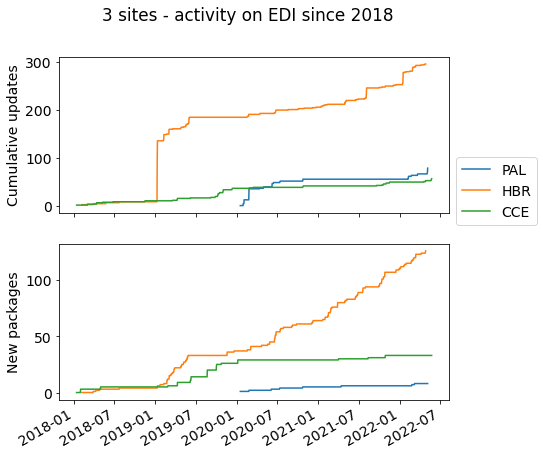

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True)

#ax[0].plot(jrn.index, jrn.n_update, label='Update pkg')
#ax[0].plot(daily.index, dfs.n_create, label='Create pkg')
#ax[0].set_ylabel('JRN events')

ax[0].plot(pal.index, pal.n_update.cumsum(), label='PAL')
ax[0].plot(hbr.index, hbr.n_update.cumsum(), label='HBR')
ax[0].plot(cce.index, cce.n_update.cumsum(), label='CCE')
ax[0].set_ylabel('Cumulative updates')

ax[1].plot(pal.index, pal.n_create.cumsum(), label='PAL')
ax[1].plot(hbr.index, hbr.n_create.cumsum(), label='HBR')
ax[1].plot(cce.index, cce.n_create.cumsum(), label='CCE')

plt.ylabel('New packages')
fig.autofmt_xdate()
plt.suptitle('3 sites - activity on EDI since 2018')
plt.legend(bbox_to_anchor=(1,1.6), loc="upper left")

In [8]:
nwtdf = edi.request_changes('2020-01-01', '2020-12-31', scope='knb-lter-nwt')
nwtdf = edi.get_counts(nwtdf)
nwt = edi.counts_to_daily(nwtdf, startdt='2020-01-01')
nwt

Requesting PASTA changes for knb-lter-nwt from 2020-01-01 to 2020-12-31
0 duplicate records were removed.


,n_update,n_create,n_tot
date,,,
2020-01-08,1,0,0
2020-01-09,0,0,0
2020-01-10,0,0,0
2020-01-11,0,0,0
2020-01-12,0,0,0
...,...,...,...
2020-11-15,0,0,0
2020-11-16,1,0,0
2020-11-17,1,0,0


In [9]:
sevdf = edi.request_changes('2020-01-01', '2020-12-31', scope='knb-lter-sev')
sevdf = edi.get_counts(sevdf)
sev = edi.counts_to_daily(sevdf, startdt='2020-01-01')
sev

Requesting PASTA changes for knb-lter-sev from 2020-01-01 to 2020-12-31
0 duplicate records were removed.


,n_update,n_create,n_tot
date,,,
2020-02-28,1,0,0
2020-02-29,0,0,0
2020-03-01,0,0,0
2020-03-02,0,0,0
2020-03-03,0,0,0
...,...,...,...
2020-09-26,0,0,0
2020-09-27,0,0,0
2020-09-28,0,0,0


In [10]:
mcmdf = edi.request_changes('2020-01-01', '2020-12-31', scope='knb-lter-mcm')
mcmdf = edi.get_counts(mcmdf)
mcm = edi.counts_to_daily(mcmdf, startdt='2020-01-01')
mcm

Requesting PASTA changes for knb-lter-mcm from 2020-01-01 to 2020-12-31
0 duplicate records were removed.


,n_update,n_create,n_tot
date,,,
2020-01-06,2,0,0
2020-01-07,0,0,0
2020-01-08,0,0,0
2020-01-09,0,0,0
2020-01-10,0,0,0
...,...,...,...
2020-12-11,0,0,0
2020-12-12,0,0,0
2020-12-13,0,0,0


In [11]:
capdf = edi.request_changes('2020-01-01', '2020-12-31', scope='knb-lter-cap')
capdf = edi.get_counts(capdf)
cap = edi.counts_to_daily(capdf, startdt='2020-01-01')
cap

Requesting PASTA changes for knb-lter-cap from 2020-01-01 to 2020-12-31
0 duplicate records were removed.


,n_update,n_create,n_tot
date,,,
2020-01-23,0,1,1
2020-01-24,1,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
2020-01-27,0,0,0
...,...,...,...
2020-12-14,0,0,0
2020-12-15,0,0,0
2020-12-16,0,1,1


In [12]:
cdrdf = edi.request_changes('2020-01-01', '2020-12-31', scope='knb-lter-cdr')
cdrdf = edi.get_counts(cdrdf)
cdr = edi.counts_to_daily(cdrdf, startdt='2020-01-01')
cdr

Requesting PASTA changes for knb-lter-cdr from 2020-01-01 to 2020-12-31
0 duplicate records were removed.


,n_update,n_create,n_tot
date,,,
2020-10-06,0,2,2
2020-10-07,0,0,0
2020-10-08,0,2,2
2020-10-09,0,0,0
2020-10-10,0,0,0
...,...,...,...
2020-12-26,0,0,0
2020-12-27,0,0,0
2020-12-28,0,0,0


In [13]:
ntldf = edi.request_changes('2020-01-01', '2020-12-31', scope='knb-lter-ntl')
ntldf = edi.get_counts(ntldf)
ntl = edi.counts_to_daily(ntldf, startdt='2020-01-01')
ntl

Requesting PASTA changes for knb-lter-ntl from 2020-01-01 to 2020-12-31
0 duplicate records were removed.


,n_update,n_create,n_tot
date,,,
2020-01-02,1,0,0
2020-01-03,0,0,0
2020-01-04,0,0,0
2020-01-05,0,0,0
2020-01-06,1,0,0
...,...,...,...
2020-12-02,0,0,0
2020-12-03,0,1,1
2020-12-04,0,0,0


## Plot activity since last report (2020-01-01)


In [5]:
import matplotlib
import matplotlib.pyplot as plt
# Figure config
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

# Get a datestamp for saving figures
import datetime
now = datetime.datetime.now().strftime("%Y%m%d")

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


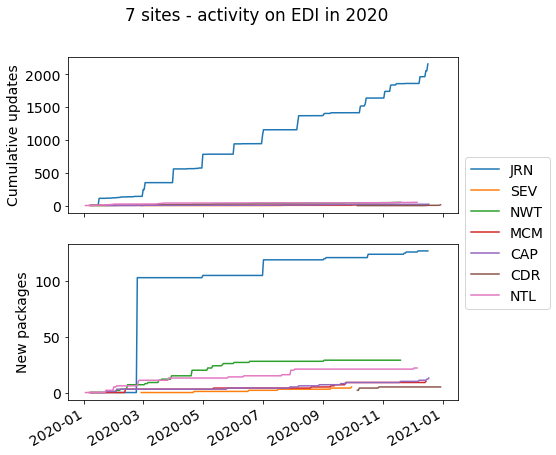

In [15]:
# All time plot:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True)

#ax[0].plot(jrn.index, jrn.n_update, label='Update pkg')
#ax[0].plot(daily.index, dfs.n_create, label='Create pkg')
#ax[0].set_ylabel('JRN events')

ax[0].plot(jrn.index, jrn.n_update.cumsum(), label='JRN')
ax[0].plot(sev.index, sev.n_update.cumsum(), label='SEV')
ax[0].plot(nwt.index, nwt.n_update.cumsum(), label='NWT')
ax[0].plot(mcm.index, mcm.n_update.cumsum(), label='MCM')
ax[0].plot(cap.index, cap.n_update.cumsum(), label='CAP')
ax[0].plot(cdr.index, cdr.n_update.cumsum(), label='CDR')
ax[0].plot(ntl.index, ntl.n_update.cumsum(), label='NTL')
ax[0].set_ylabel('Cumulative updates')

ax[1].plot(jrn.index, jrn.n_create.cumsum(), label='JRN')
ax[1].plot(sev.index, sev.n_create.cumsum(), label='SEV')
ax[1].plot(nwt.index, nwt.n_create.cumsum(), label='NWT')
ax[1].plot(mcm.index, mcm.n_create.cumsum(), label='MCM')
ax[1].plot(cap.index, cap.n_create.cumsum(), label='CAP')
ax[1].plot(cdr.index, cdr.n_create.cumsum(), label='CDR')
ax[1].plot(ntl.index, ntl.n_create.cumsum(), label='NTL')

plt.ylabel('New packages')
fig.autofmt_xdate()
plt.suptitle('7 sites - activity on EDI in 2020')
plt.legend(bbox_to_anchor=(1,1.6), loc="upper left")

import os
#fig.savefig(os.path.expanduser("/Users/gmaurer/GD_gmaurer.jrn.lter/IM/figures/LTERcomp_EDI_2020_{0}.png".format(now)),
#            dpi=150, bbox_inches='tight',facecolor='w')

In [16]:
nomet = np.logical_and(jrndf.studyid!='437', jrndf.studyid!='548')
jrn_nomet = edi.counts_to_daily(jrndf.loc[nomet], startdt='2020-01-01')

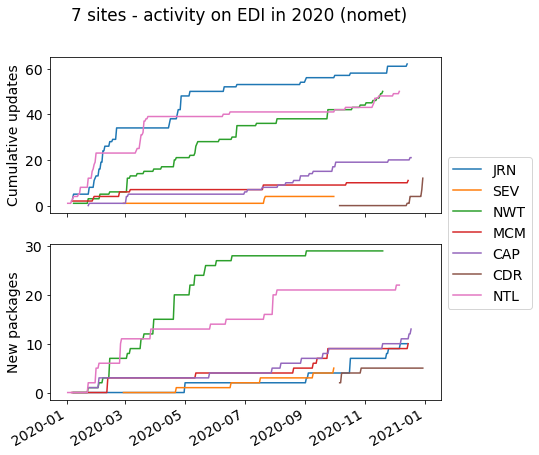

In [20]:
# All time plot:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True)

#ax[0].plot(jrn.index, jrn.n_update, label='Update pkg')
#ax[0].plot(daily.index, dfs.n_create, label='Create pkg')
#ax[0].set_ylabel('JRN events')

ax[0].plot(jrn_nomet.index, jrn_nomet.n_update.cumsum(), label='JRN')
ax[0].plot(sev.index, sev.n_update.cumsum(), label='SEV')
ax[0].plot(nwt.index, nwt.n_update.cumsum(), label='NWT')
ax[0].plot(mcm.index, mcm.n_update.cumsum(), label='MCM')
ax[0].plot(cap.index, cap.n_update.cumsum(), label='CAP')
ax[0].plot(cdr.index, cdr.n_update.cumsum(), label='CDR')
ax[0].plot(ntl.index, ntl.n_update.cumsum(), label='NTL')
ax[0].set_ylabel('Cumulative updates')

ax[1].plot(jrn_nomet.index, jrn_nomet.n_create.cumsum(), label='JRN')
ax[1].plot(sev.index, sev.n_create.cumsum(), label='SEV')
ax[1].plot(nwt.index, nwt.n_create.cumsum(), label='NWT')
ax[1].plot(mcm.index, mcm.n_create.cumsum(), label='MCM')
ax[1].plot(cap.index, cap.n_create.cumsum(), label='CAP')
ax[1].plot(cdr.index, cdr.n_create.cumsum(), label='CDR')
ax[1].plot(ntl.index, ntl.n_create.cumsum(), label='NTL')

plt.legend(bbox_to_anchor=(1,1.6), loc="upper left")
plt.ylabel('New packages')
fig.autofmt_xdate()
plt.suptitle('7 sites - activity on EDI in 2020 (nomet)')

import os
fig.savefig(os.path.expanduser("/Users/gmaurer/GD_gmaurer.jrn.lter/IM/figures/LTERcomp_EDI_2020_JRNnomet_{0}.png".format(now)),
            dpi=150, bbox_inches='tight',facecolor='w')

### Total number of packages

In [119]:
daily.n_create.sum()

127